# Actividad Analítica 2

**Equipo Chiles en Nogada:**


In [72]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sas
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/HACKMX2021/tardaMucho.csv")
#data.cnt = data.cnt / data.cnt.max()

data.head(n=5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Estadística Descriptiva

Número de renglones

In [73]:
len(data)

2707

Número de columnas

In [74]:
len(data.columns)


11

Tabla resumen de las variables

In [75]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,2707.0,2.707000e+03,2.707000e+03,2.707000e+03,2.707000e+03,2.707000e+03,2707.000000,2707.0
mean,1.0,1.054388e+05,8.838826e+05,9.049670e+05,7.460561e+05,9.870833e+05,0.005911,0.0
std,0.0,2.437431e+05,1.990892e+06,2.035748e+06,2.253764e+06,2.917219e+06,0.076667,0.0
min,1.0,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.0,3.942805e+03,1.520000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.0,1.028648e+04,2.384500e+04,1.584128e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,1.0,1.192169e+05,2.563311e+05,2.612977e+05,3.697303e+05,2.775150e+05,0.000000,0.0
max,1.0,3.776389e+06,1.010000e+07,1.020000e+07,1.950000e+07,1.920000e+07,1.000000,0.0


¿Hay datos nulos?

In [76]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

¿Hay datos duplicados?

In [77]:
data.duplicated().any()

False

Rangos de las variables:

In [78]:
#print("step "+str(data["step"].max() - data["step"].min()))
print("amount "+str(data["amount"].max() - data["amount"].min()))
print("oldbalanceOrg "+str(data["oldbalanceOrg"].max() - data["oldbalanceOrg"].min()))
print("newbalanceOrig "+str(data["newbalanceOrig"].max() - data["newbalanceOrig"].min()))
print("oldbalanceDest "+str(data["oldbalanceDest"].max() - data["oldbalanceDest"].min()))
print("newbalanceDest "+str(data["newbalanceDest"].max() - data["newbalanceDest"].min()))
print("isFraud "+str(data["isFraud"].max() - data["isFraud"].min()))
print("isFlaggedFraud "+str(data["isFlaggedFraud"].max() - data["isFlaggedFraud"].min()))


amount 3776382.67
oldbalanceOrg 10100000.0
newbalanceOrig 10200000.0
oldbalanceDest 19500000.0
newbalanceDest 19200000.0
isFraud 1
isFlaggedFraud 0


Tipos de datos de las variables

In [79]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Medidas estadísiticas:

In [80]:
print("Mean: "+str(data["step"].mean()))
print("Median: "+str(data["step"].median()))
print("Min: "+str(data["step"].min()))
print("Max: "+str(data["step"].max()))
print("Std: "+str(data["step"].std()))

Mean: 1.0
Median: 1.0
Min: 1
Max: 1
Std: 0.0


In [81]:
print("Mean: "+str(data["amount"].mean()))
print("Median: "+str(data["amount"].median()))
print("Min: "+str(data["amount"].min()))
print("Max: "+str(data["amount"].max()))
print("Std: "+str(data["amount"].std()))

Mean: 105438.83390838574
Median: 10286.48
Min: 6.42
Max: 3776389.09
Std: 243743.10795895982


In [82]:
print("Mean: "+str(data["oldbalanceOrg"].mean()))
print("Median: "+str(data["oldbalanceOrg"].median()))
print("Min: "+str(data["oldbalanceOrg"].min()))
print("Max: "+str(data["oldbalanceOrg"].max()))
print("Std: "+str(data["oldbalanceOrg"].std()))

Mean: 883882.6377281112
Median: 23845.0
Min: 0.0
Max: 10100000.0
Std: 1990892.239231992


In [83]:
print("Mean: "+str(data["newbalanceOrig"].mean()))
print("Median: "+str(data["newbalanceOrig"].median()))
print("Min: "+str(data["newbalanceOrig"].min()))
print("Max: "+str(data["newbalanceOrig"].max()))
print("Std: "+str(data["newbalanceOrig"].std()))


Mean: 904967.0154636125
Median: 15841.28
Min: 0.0
Max: 10200000.0
Std: 2035747.8120190164


In [84]:
print("Mean: "+str(data["oldbalanceDest"].mean()))
print("Median: "+str(data["oldbalanceDest"].median()))
print("Min: "+str(data["oldbalanceDest"].min()))
print("Max: "+str(data["oldbalanceDest"].max()))
print("Std: "+str(data["oldbalanceDest"].std()))

Mean: 746056.0718840039
Median: 0.0
Min: 0.0
Max: 19500000.0
Std: 2253764.001297617


In [85]:
print("Mean: "+str(data["newbalanceDest"].mean()))
print("Median: "+str(data["newbalanceDest"].median()))
print("Min: "+str(data["newbalanceDest"].min()))
print("Max: "+str(data["newbalanceDest"].max()))
print("Std: "+str(data["newbalanceDest"].std()))

Mean: 987083.3067417786
Median: 0.0
Min: 0.0
Max: 19200000.0
Std: 2917219.1243370683


In [86]:
print("Mean: "+str(data["isFraud"].mean()))
print("Median: "+str(data["isFraud"].median()))
print("Min: "+str(data["isFraud"].min()))
print("Max: "+str(data["isFraud"].max()))
print("Std: "+str(data["isFraud"].std()))

Mean: 0.005910602142593277
Median: 0.0
Min: 0
Max: 1
Std: 0.07666706119725039


In [87]:
print("Mean: "+str(data["isFlaggedFraud"].mean()))
print("Median: "+str(data["isFlaggedFraud"].median()))
print("Min: "+str(data["isFlaggedFraud"].min()))
print("Max: "+str(data["isFlaggedFraud"].max()))
print("Std: "+str(data["isFlaggedFraud"].std()))

Mean: 0.0
Median: 0.0
Min: 0
Max: 0
Std: 0.0


# Gráficas

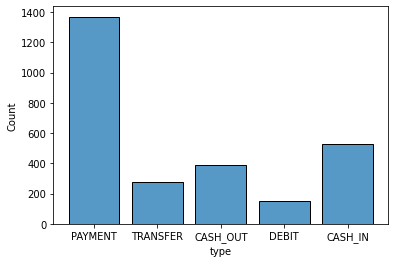

In [88]:
sas.histplot(data=data, x="type",  shrink=.8)


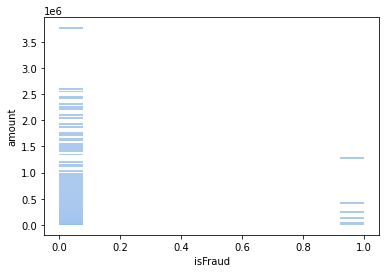

In [89]:
sas.histplot(data, x="isFraud", y="amount" )

OKAY, FALTAN MÁS, PERO NO SÉ QUE PONER

# Heatmap

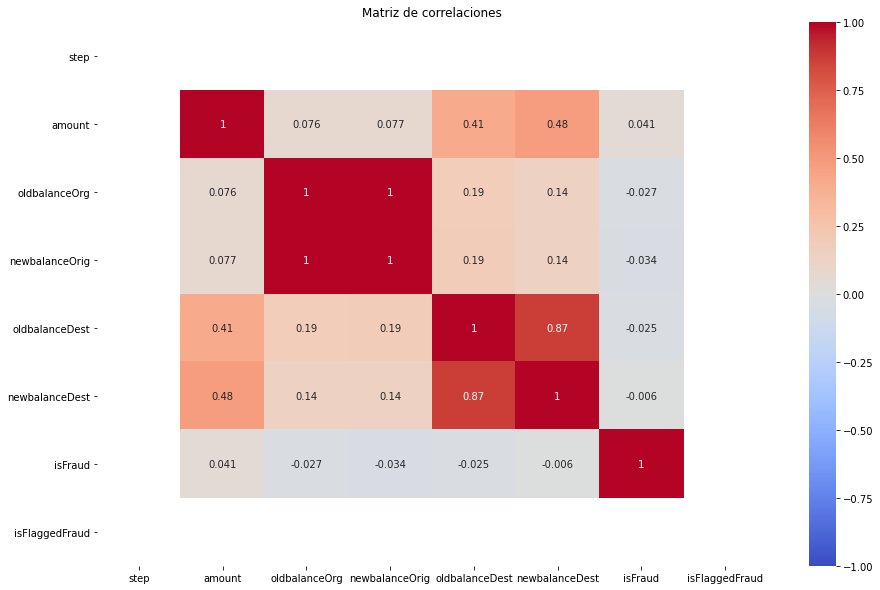

In [90]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
ax.set_title("Matriz de correlaciones")
filtro = data.columns != "instant"
sas.heatmap(data[ data.columns[filtro]].corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

Interpretación:
El heatmap muestra que no existen correlaciones fuertes entre variables de interés. 

# Regresión lineal

In [100]:
temps = data.amount.unique()
temps

array([9839.64, 1864.28,  181.  , ..., 4541.85,  525.89,  353.62])

In [101]:
matriz = []
for tmp in temps:
  same_tmp = data[data.amount == tmp].copy()
  isFraud = same_tmp['isFraud']
  total_dia = sum(isFraud)
  matriz.append([tmp, total_dia])

In [103]:
titulos = ['amount', 'isFraud']
dataset = pd.DataFrame(data=matriz, columns=titulos)
dataset.isFraud = dataset.isFraud / dataset.isFraud.max() # Normalización


In [104]:
X = np.array(dataset["amount"]).reshape(-1,1)
Y = dataset['isFraud']

In [105]:
regresion = LinearRegression(fit_intercept=True)
regresion.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_hat = regresion.predict(X)

In [107]:
error_ = mean_squared_error(Y, y_hat)
error_

0.0027675597214650875

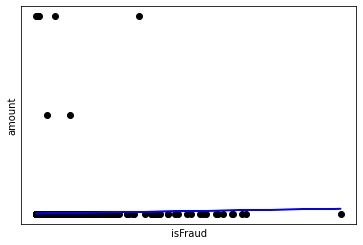

In [108]:
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.scatter(X, Y, color='black')
plt.plot(X, y_hat, color='blue')
plt.xticks(())
plt.yticks(())
plt.show()



Intepretación: La regresión indica 




# Regresión múltiple

In [113]:
X = data.iloc[:, [2,10]].values #
X

array([[9839.64,    0.  ],
       [1864.28,    0.  ],
       [ 181.  ,    0.  ],
       ...,
       [4541.85,    0.  ],
       [ 525.89,    0.  ],
       [ 353.62,    0.  ]])

In [114]:
y = data.iloc[:, [9]].values
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [116]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


1894
813
1894
813


In [117]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
multiple_regression = LinearRegression()


In [119]:
multiple_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_hatm = multiple_regression.predict(X_test)

In [121]:
error_m = mean_squared_error(y_test, y_hatm)
error_m

0.0037359590562938117

Predicciones de prueba:

**Referencia:**
https://www.kaggle.com/ntnu-testimon/paysim1


---

